# Chapter 3 + 4 (Below is Chapter 3)

Name: Zachary Campbell
Week: 4
Assignment: 3-1, 3-2, 4-1 4-2


In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [2]:
import numpy as np

Again, I'll load the NSFG pregnancy file and select live births:

In [3]:
import nsfg
import first
import thinkstats2
import thinkplot

In [4]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

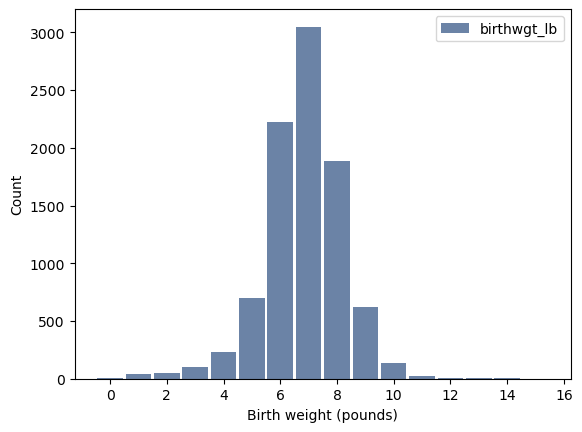

In [5]:
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

To normalize the disrtibution, we could divide through by the total count:

In [6]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

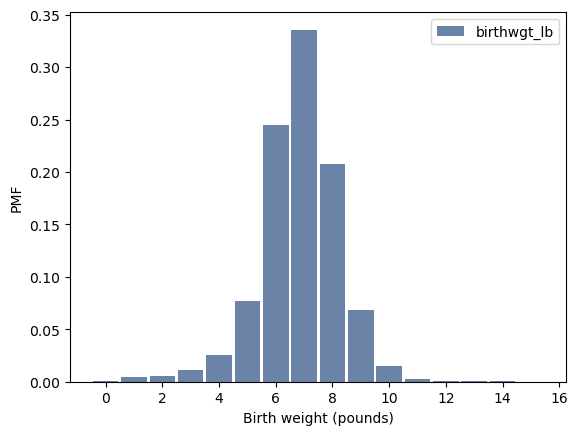

In [7]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="PMF")

More directly, we can create a Pmf object.

In [8]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [9]:
pmf.Prob(2)

0.4

The bracket operator does the same thing.

In [10]:
pmf[2]

0.4

The `Incr` method adds to the probability associated with a given values.

In [11]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

The `Mult` method multiplies the probability associated with a value.

In [12]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [13]:
pmf.Total()

0.8999999999999999

`Normalize` divides through by the total probability, making it 1 again.

In [14]:
pmf.Normalize()
pmf.Total()

1.0

Here's the PMF of pregnancy length for live births.

In [15]:
pmf = thinkstats2.Pmf(live.prglngth, label="prglngth")

Here's what it looks like plotted with `Hist`, which makes a bar graph.

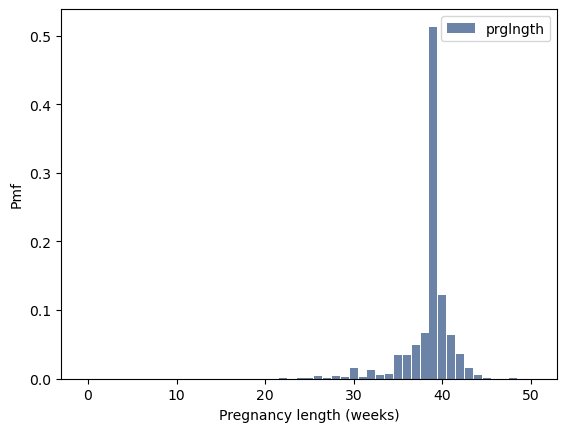

In [16]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="Pmf")

Here's what it looks like plotted with `Pmf`, which makes a step function.

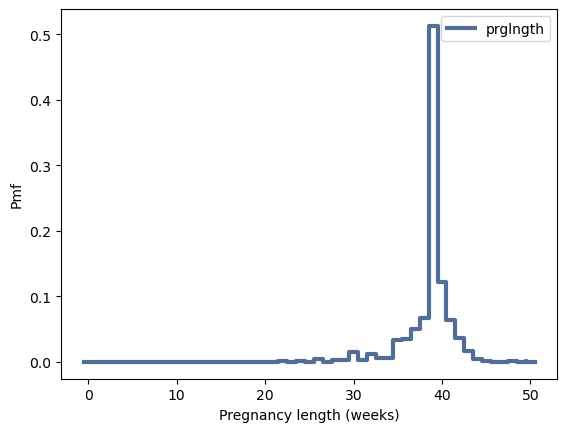

In [17]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="Pmf")

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [18]:
live, firsts, others = first.MakeFrames()

Here are the distributions of pregnancy length.

In [19]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label="firsts")
other_pmf = thinkstats2.Pmf(others.prglngth, label="others")

And here's the code that replicates one of the figures in the chapter.

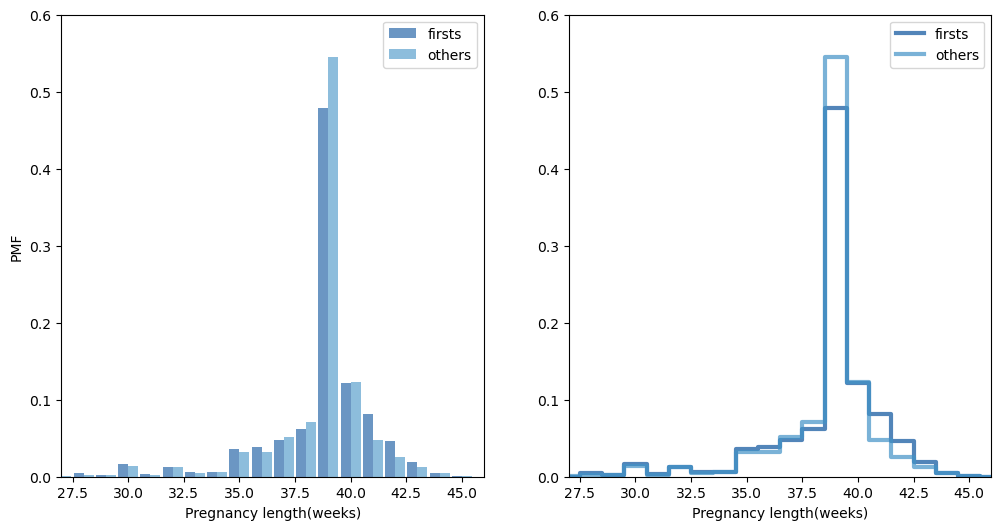

In [20]:
width = 0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align="right", width=width)
thinkplot.Hist(other_pmf, align="left", width=width)
thinkplot.Config(xlabel="Pregnancy length(weeks)", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel="Pregnancy length(weeks)", axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

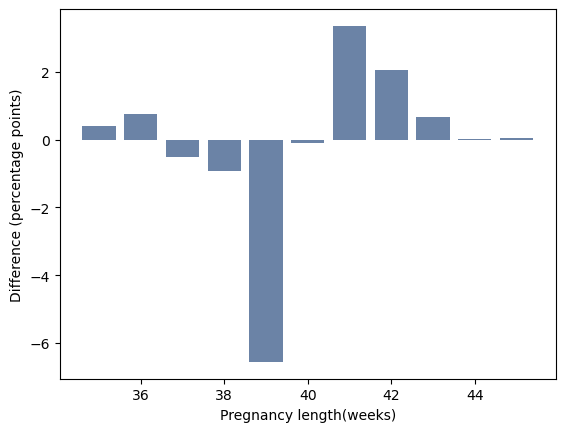

In [21]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [22]:
d = {7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}

pmf = thinkstats2.Pmf(d, label="actual")

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [23]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

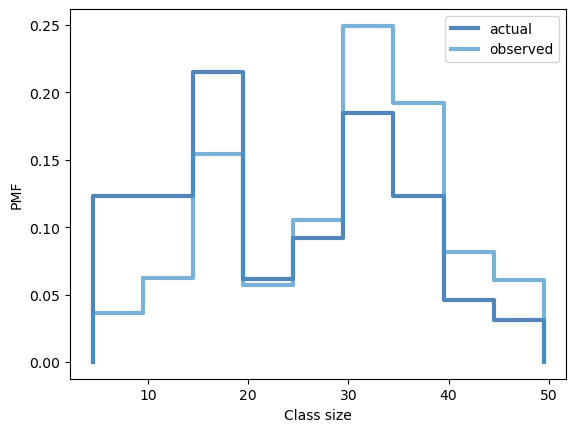

In [24]:
biased_pmf = BiasPmf(pmf, label="observed")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel="Class size", ylabel="PMF")

The observed mean is substantially higher than the actual.

In [25]:
print("Actual mean", pmf.Mean())
print("Observed mean", biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [26]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1 / x

    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [27]:
unbiased = UnbiasPmf(biased_pmf, label="unbiased")
print("Unbiased mean", unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same.

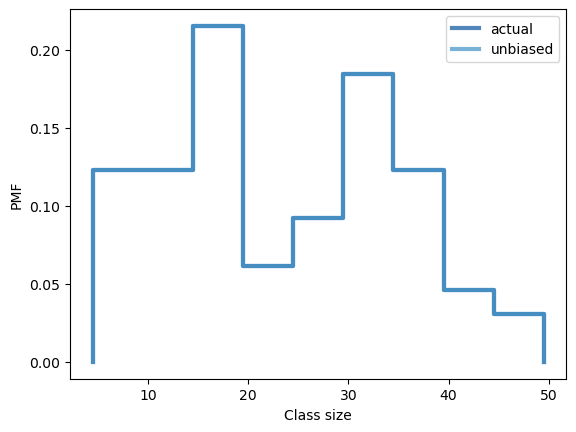

In [28]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel="Class size", ylabel="PMF")

### Pandas indexing

Here's an example of a small DataFrame.

In [29]:
import numpy as np
import pandas

array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,-0.860074,-0.615692
1,-1.133793,-1.522665
2,-0.794278,-1.068804
3,-1.116850,0.935183


We can specify column names when we create the DataFrame:

In [30]:
columns = ["A", "B"]
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,-0.860074,-0.615692
1,-1.133793,-1.522665
2,-0.794278,-1.068804
3,-1.116850,0.935183


We can also specify an index that contains labels for the rows.

In [31]:
index = ["a", "b", "c", "d"]
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.860074,-0.615692
b,-1.133793,-1.522665
c,-0.794278,-1.068804
d,-1.116850,0.935183


Normal indexing selects columns.

In [32]:
df["A"]

a   -0.860074
b   -1.133793
c   -0.794278
d   -1.116850
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [33]:
df.loc["a"]

A   -0.860074
B   -0.615692
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [34]:
df.iloc[0]

A   -0.860074
B   -0.615692
Name: a, dtype: float64

`loc` can also take a list of labels.

In [35]:
indices = ["a", "c"]
df.loc[indices]

,A,B
a,-0.860074,-0.615692
c,-0.794278,-1.068804


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [36]:
df["a":"c"]

,A,B
a,-0.860074,-0.615692
b,-1.133793,-1.522665
c,-0.794278,-1.068804


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [37]:
df[0:2]

,A,B
a,-0.860074,-0.615692
b,-1.133793,-1.522665


But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

**Exercise 3-1:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [38]:
import requests
 
url = 'https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct'
url_get = requests.get(url)
url2 = 'https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz'
url2_get = requests.get(url2)

In [39]:
resp = nsfg.ReadFemResp()
numkdhh_pmf = thinkstats2.Pmf(resp['numkdhh'], label='actual')
numkdhh_pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'actual')

In [40]:
# Create copy and confirm values

pmf = numkdhh_pmf.Copy()
print(pmf)
print(pmf.Total())
print('mean', pmf.Mean())

actual
1.0
mean 1.024205155043831


In [41]:
# Weight PMF by number of children that would respond with each value

def AddBiasPmf(pmf, label):
    childs_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        childs_pmf.Mult(x, x)
    childs_pmf.Normalize()
    return childs_pmf

childs_pmf = AddBiasPmf(pmf, 'childs_view')
print(childs_pmf)
print(childs_pmf.Total())
print('mean', childs_pmf.Mean())

childs_view
1.0
mean 2.403679100664282


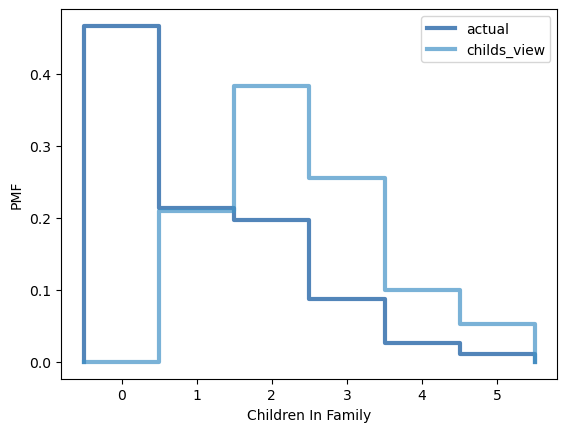

<Figure size 800x600 with 0 Axes>

In [42]:
# To Plot

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, childs_pmf])
thinkplot.Show(xlabel='Children In Family', ylabel='PMF')

In [43]:
# The True Mean
print('True Mean', pmf.Mean())

True Mean 1.024205155043831


In [44]:
# Mean based on the child's response
print("Child's view mean", childs_pmf.Mean())

Child's view mean 2.403679100664282


**Exercise 3-2:** In Chapter 3 we computed the mean of a sample by adding up
the elements and dividing by n.  If you are given a PMF, you can
still compute the mean, but the process is slightly different:
%
$$ \xbar = \sum_i p_i~x_i $$
%
where the $x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$.
Similarly, you can compute variance like this:
%
$$ S^2 = \sum_i p_i~(x_i - \xbar)^2 $$
% 
Write functions called `PmfMean` and `PmfVar` that take a
Pmf object and compute the mean and variance.  To test these methods,
check that they are consistent with the methods `Mean` and `Var`
provided by `Pmf`.

In [45]:
def PmfMean(pmf):
    mean = 0
    for x, p in pmf.Items():
        mean += x*p
    return sum(p * x for x, p in pmf.Items())

PmfMean(childs_pmf)

2.403679100664282

In [46]:
def PmfVar(pmf, mu=None):
    variance=0
    pmf_mean=PmfMean(pmf)
    for x, p in pmf.Items():
        variance += p * np.power(x-pmf_mean, 2)
    return variance
    
    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())
PmfVar(childs_pmf)

1.1732721055059874

# Chapter 3 + 4 (Below is Chapter 4)

Name: Zachary Campbell
Week: 4
Assignment: 3-1, 3-2, 4-1 4-2


In [47]:
import numpy as np

In [48]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [49]:
import thinkstats2
import thinkplot

## Examples

One more time, I'll load the data from the NSFG.

In [50]:
import first

live, firsts, others = first.MakeFrames()

And compute the distribution of birth weight for first babies and others.

In [51]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

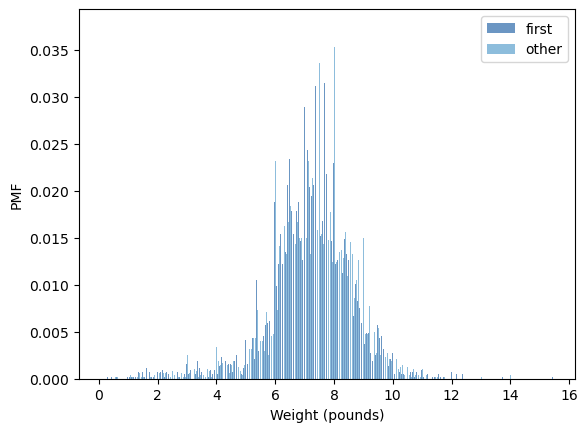

In [52]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [53]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

If this is the list of scores.

In [54]:
t = [55, 66, 77, 88, 99]

If you got the 88, your percentile rank is 80.

In [55]:
PercentileRank(t, 88)

80.0

`Percentile` takes a percentile rank and computes the corresponding percentile. 

In [56]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

The median is the 50th percentile, which is 77.

In [57]:
Percentile(t, 50)

77

Here's a more efficient way to compute percentiles.

In [58]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[int(index)]

Let's hope we get the same answer.

In [59]:
Percentile2(t, 50)

77

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`.  The only difference is that the result is 0-1 instead of 0-100.

In [60]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In this list

In [61]:
t = [1, 2, 2, 3, 5]

We can evaluate the CDF for various values:

In [62]:
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

Here's an example using real data, the distribution of pregnancy length for live births.

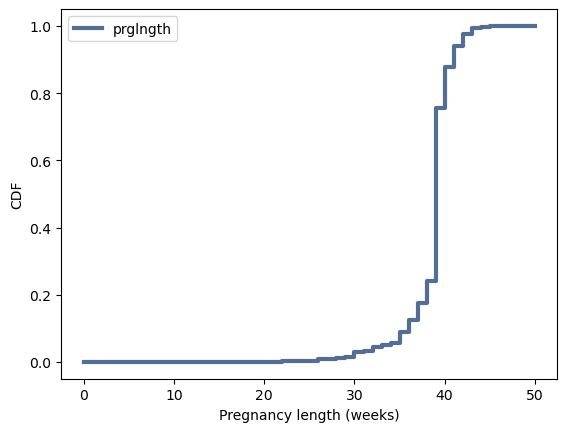

In [63]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.  For example, 94% of pregnancy lengths are less than or equal to 41.

In [64]:
cdf.Prob(41)

0.9406427634455619

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.  For example, the median is the value that corresponds to 0.5.

In [65]:
cdf.Value(0.5)

39

In general, CDFs are a good way to visualize distributions.  They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

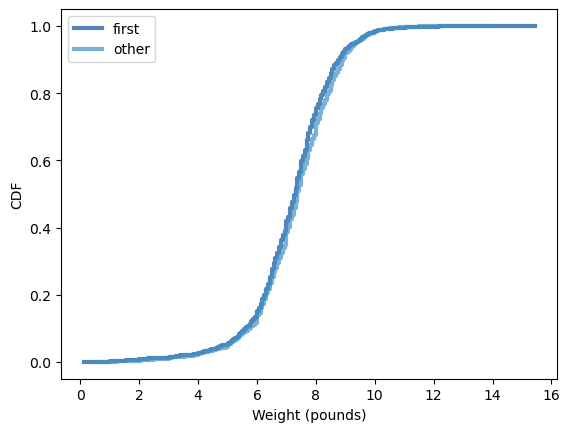

In [66]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In this example, we can see that first babies are slightly, but consistently, lighter than others.

We can use the CDF of birth weight to compute percentile-based statistics.

In [67]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

Again, the median is the 50th percentile.

In [68]:
median = live_cdf.Percentile(50)
median

7.375

The interquartile range is the interval from the 25th to 75th percentile.

In [69]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

We can use the CDF to look up the percentile rank of a particular value.  For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [70]:
live_cdf.PercentileRank(10.2)

98.82717415357381

If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [71]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

The resulting list of ranks should be approximately uniform from 0-1.

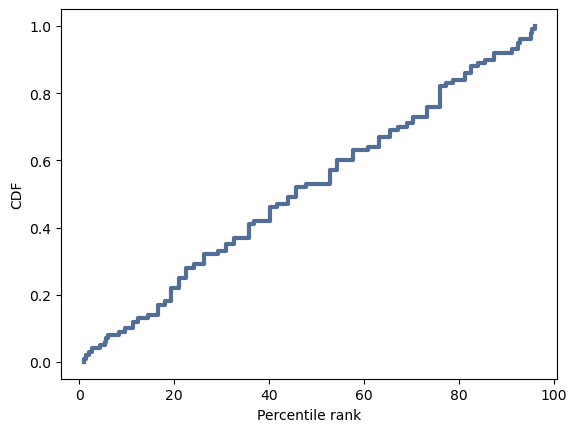

In [72]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf.  Here's an example.

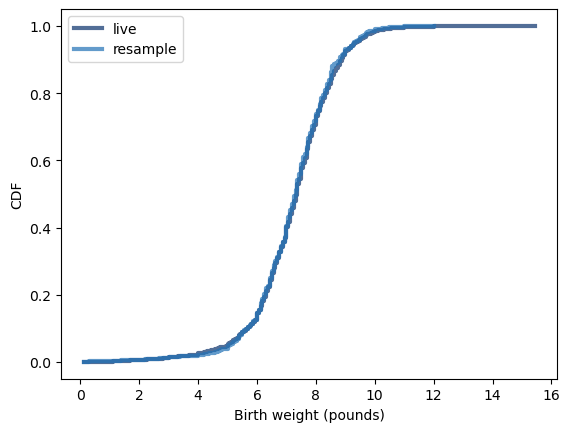

In [73]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

This confirms that the random sample has the same distribution as the original data.

# Chapter 4

Name: Zachary Campbell
Week: 4
Assignment: 3-1, 3-2, 4-1 4-2


In [75]:
import numpy as np

In [76]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [77]:
import thinkstats2
import thinkplot

## Examples

One more time, I'll load the data from the NSFG.

In [78]:
import first

live, firsts, others = first.MakeFrames()

And compute the distribution of birth weight for first babies and others.

In [79]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

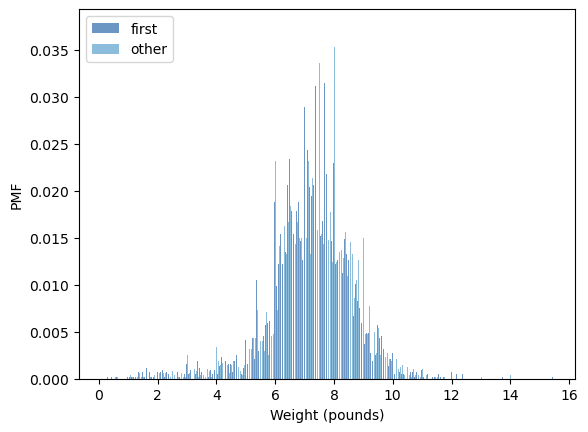

In [80]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [81]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

If this is the list of scores.

In [82]:
t = [55, 66, 77, 88, 99]

If you got the 88, your percentile rank is 80.

In [83]:
PercentileRank(t, 88)

80.0

`Percentile` takes a percentile rank and computes the corresponding percentile. 

In [84]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

The median is the 50th percentile, which is 77.

In [85]:
Percentile(t, 50)

77

Here's a more efficient way to compute percentiles.

In [86]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[int(index)]

Let's hope we get the same answer.

In [87]:
Percentile2(t, 50)

77

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`.  The only difference is that the result is 0-1 instead of 0-100.

In [88]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In this list

In [89]:
t = [1, 2, 2, 3, 5]

We can evaluate the CDF for various values:

In [90]:
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

Here's an example using real data, the distribution of pregnancy length for live births.

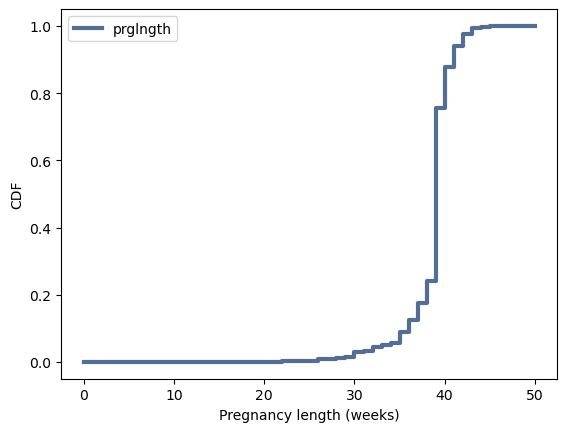

In [91]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.  For example, 94% of pregnancy lengths are less than or equal to 41.

In [92]:
cdf.Prob(41)

0.9406427634455619

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.  For example, the median is the value that corresponds to 0.5.

In [93]:
cdf.Value(0.5)

39

In general, CDFs are a good way to visualize distributions.  They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

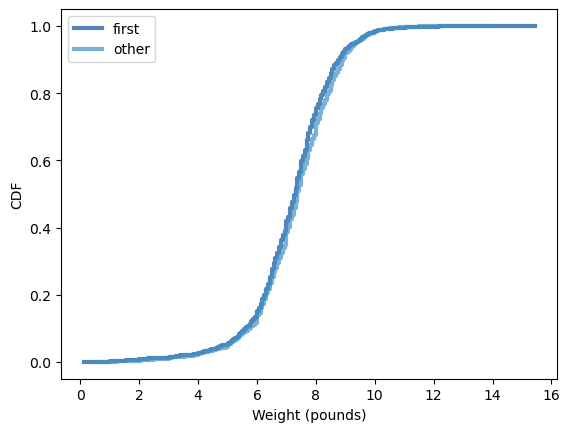

In [94]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In this example, we can see that first babies are slightly, but consistently, lighter than others.

We can use the CDF of birth weight to compute percentile-based statistics.

In [95]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

Again, the median is the 50th percentile.

In [96]:
median = live_cdf.Percentile(50)
median

7.375

The interquartile range is the interval from the 25th to 75th percentile.

In [97]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

We can use the CDF to look up the percentile rank of a particular value.  For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [98]:
live_cdf.PercentileRank(10.2)

98.82717415357381

If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [99]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

The resulting list of ranks should be approximately uniform from 0-1.

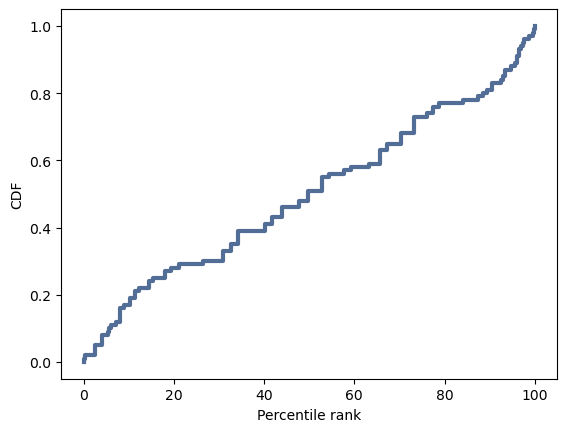

In [100]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf.  Here's an example.

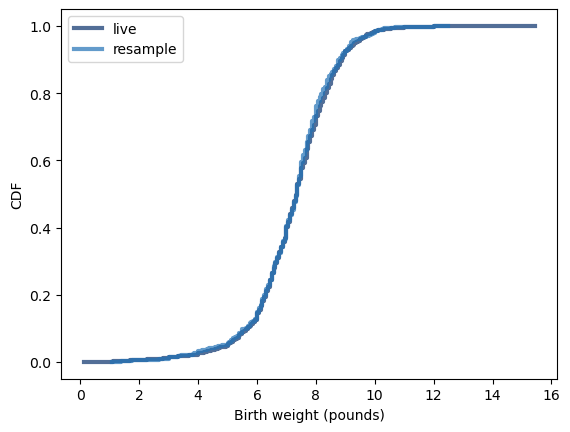

In [101]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

This confirms that the random sample has the same distribution as the original data.

## Exercises

**Exercise 4-1:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [102]:
weight = 7.06580

first_cdf.PercentileRank(weight)

43.27297730919092

I am thankfully within a very low percentile. I asked my friend how much he wieghed and he said 10 pounds. He thought he was a light baby.

**Exercise 4-2:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [103]:
random = np.random.random(size=1000)
random

array([0.90671311, 0.34618863, 0.67817369, 0.08674311, 0.1684761 ,
       0.09470835, 0.12131395, 0.31924821, 0.73464828, 0.73220824,
       0.1970441 , 0.81242416, 0.41561198, 0.97109931, 0.0123738 ,
       0.38556534, 0.27456872, 0.05838673, 0.8965997 , 0.35930217,
       0.45450397, 0.87478876, 0.54642734, 0.700738  , 0.46289069,
       0.52062997, 0.72732205, 0.28352825, 0.77031036, 0.06305817,
       0.59435799, 0.20839943, 0.5433145 , 0.19199329, 0.29511639,
       0.28008261, 0.90362996, 0.10878698, 0.86472506, 0.22715942,
       0.96218821, 0.822334  , 0.10487245, 0.98777175, 0.72029311,
       0.71327384, 0.91135431, 0.03633661, 0.92031789, 0.00238159,
       0.43436515, 0.94500067, 0.02875704, 0.94681423, 0.30322843,
       0.75645512, 0.95627111, 0.66866659, 0.36237716, 0.50805874,
       0.65808859, 0.66357519, 0.42328545, 0.41362515, 0.22304537,
       0.98384466, 0.87720595, 0.43304062, 0.97085003, 0.28619872,
       0.90053739, 0.05055031, 0.30070987, 0.39621987, 0.87736

In [104]:
random_pmf = thinkstats2.Pmf(random, label='NP random sample')
random_pmf

Pmf({0.9067131131227334: 0.001, 0.3461886331794247: 0.001, 0.6781736884168412: 0.001, 0.08674311330374429: 0.001, 0.16847610184612616: 0.001, 0.09470834978536324: 0.001, 0.12131395243503207: 0.001, 0.31924820530719666: 0.001, 0.7346482808062303: 0.001, 0.7322082401482862: 0.001, 0.19704409610534424: 0.001, 0.8124241640569847: 0.001, 0.4156119756420211: 0.001, 0.971099305383408: 0.001, 0.012373803779382797: 0.001, 0.3855653418558389: 0.001, 0.27456871911106795: 0.001, 0.05838672994810956: 0.001, 0.8965996994599903: 0.001, 0.3593021672369223: 0.001, 0.45450397198166137: 0.001, 0.8747887568070724: 0.001, 0.5464273365078591: 0.001, 0.7007380022212814: 0.001, 0.4628906901251816: 0.001, 0.5206299725824729: 0.001, 0.7273220475046526: 0.001, 0.28352824897376516: 0.001, 0.7703103617163513: 0.001, 0.06305817124328117: 0.001, 0.5943579905896413: 0.001, 0.20839942888797724: 0.001, 0.5433144967030691: 0.001, 0.19199328574111518: 0.001, 0.2951163927262511: 0.001, 0.2800826140196706: 0.001, 0.9036299

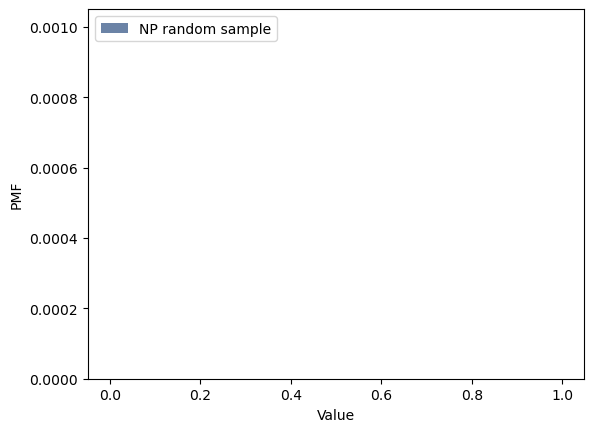

In [105]:
thinkplot.Hist(random_pmf)
thinkplot.Config(xlabel='Value', ylabel='PMF')

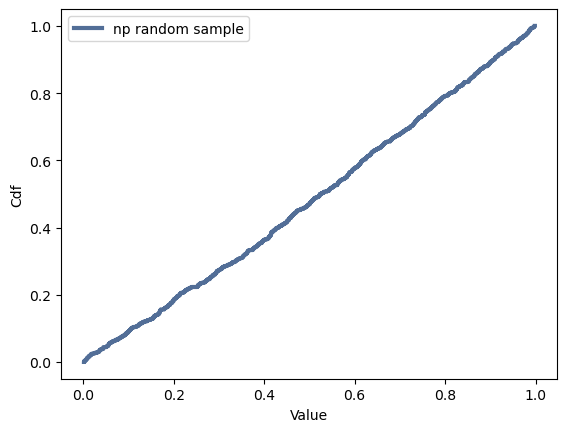

In [106]:
random_cdf = thinkstats2.Cdf(random, label='np random sample')
thinkplot.Cdf(random_cdf)
thinkplot.Config(xlabel='Value', ylabel='Cdf')

This is relatively normally distributed. When graphed using a histogram the output does not seem as distributed but the CDF graph shows that it is fairly distributed